## **Testing simple scratch implementation of Gaussian Naive Bayes**

##### **[1] Import depedencies & Env Setup**

In [73]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [74]:
# Import core libraries
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import Scikit learn modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Import custom Gaussian Naive Bayes Model
from src.models.NaiveBayes import GaussianNaiveBayes
importlib.reload(GaussianNaiveBayes)
from src.models.NaiveBayes.GaussianNaiveBayes import GaussianNaiveBayes

##### **[2] Initialize Custom GNB & SciKitLearn GNB models**

In [75]:
# Initialize Custom Gaussian Naive Bayes Model
CGNB = GaussianNaiveBayes()
# Initialize SK-Learn Gaussian Naive Bayes Model
SKGNB = GaussianNB()

##### **[3] Data Preprocessing**

In [76]:
# Get the Breast Cancer Data
data = pd.read_csv("../data/breast-cancer-wisconsin.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [78]:
# Drop the ID column
data.drop(columns=["id"], inplace=True)

# Convert Diagnosis to numeric values
data["diagnosis"] = data["diagnosis"].map({'M': 1, 'B': 0})
target_names = ["malignant", "benign"]

# Separate the features and targets
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training samples: {X_train.shape[0]} | Testing samples: {X_test.shape[0]}")

Training samples: 455 | Testing samples: 114


##### **[4] Train Custom GNB & SKLearn GNB models**

In [79]:
# Train the SK-Learn Gaussian Naive Bayes Model
SKGNB.fit(X_train, y_train)
# Train the Custom Gaussian Naive Bayes Model
CGNB.fit(X_train, y_train)

##### **[5] Make predictions using Custom GNB & SKLearn GNB models**

In [80]:
# Make predictions using SK-Learn GNB model
y_pred_skgnb = SKGNB.predict(X_test)
# Make predictions using Custom GNB model
y_pred_cgnb = CGNB.predict(X_test)

In [81]:
# Make prediction for Posterior probabilites using SK-Learn GNB model
y_prob_pred_skgnb = SKGNB.predict_proba(X_test)
# Make prediction for Posterior probabilites using Custom GNB model
y_prob_pred_cgnb = CGNB.predict_probability(X_test)

##### **[6] Evaluate Custom GNB & SKLearn GNB models**

In [86]:
# Classification report for SK-Learn GNB model
print(f"[*] Accuracy Score for SK-Learn GNB model: {accuracy_score(y_test, y_pred_skgnb) * 100}%")
print(f"[*] Classification Report for SK-Learn GNB model\n\n {classification_report(y_test, y_pred_skgnb, target_names=target_names)}")
# Classfication report for Custom GNB model
print(f"[*] Accuracy Score for Custom GNB model: {accuracy_score(y_test, y_pred_cgnb) * 100}%")
print(f"[*] Classification Report for Custom GNB model\n\n {classification_report(y_test, y_pred_cgnb, target_names=target_names)}")

[*] Accuracy Score for SK-Learn GNB model: 93.85964912280701%
[*] Classification Report for SK-Learn GNB model

               precision    recall  f1-score   support

   malignant       0.91      1.00      0.95        72
      benign       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[*] Accuracy Score for Custom GNB model: 92.10526315789474%
[*] Classification Report for Custom GNB model

               precision    recall  f1-score   support

   malignant       0.92      0.96      0.94        72
      benign       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [83]:
# Confusion matrix for SK-Learn GNB model
skgnb_conf_mat = confusion_matrix(y_test, y_pred_skgnb)
# Confusion matrix for Custom GNB model
cgnb_conf_mat = confusion_matrix(y_test, y_pred_cgnb)

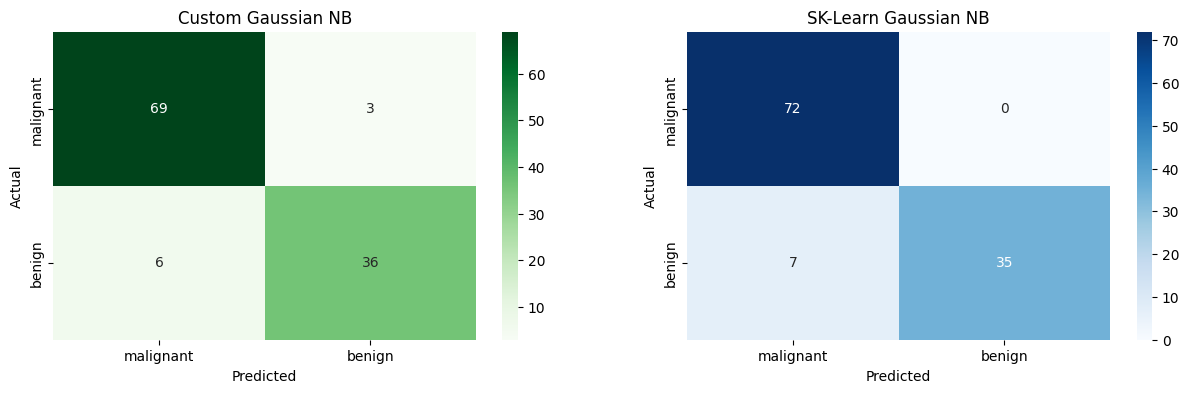

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
labels = ["malignant", "benign"]

sb.heatmap(cgnb_conf_mat, annot=True, fmt='d', cmap="Greens", ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title("Custom Gaussian NB")

sb.heatmap(skgnb_conf_mat, annot=True, fmt="d", cmap="Blues", ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title("SK-Learn Gaussian NB")

for ax in axes:
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.show()

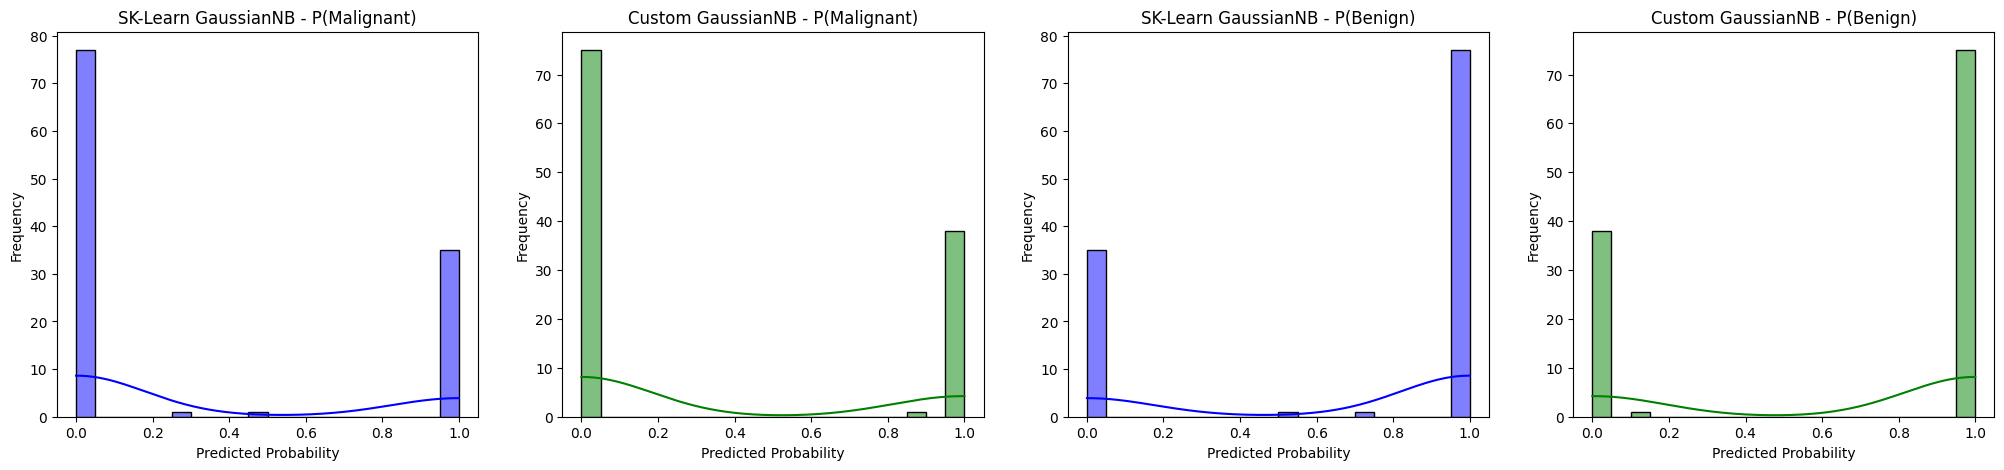

In [85]:
# Create subplots for visual comparison
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# Plot probability of positive class (e.g., "malignant" or class=1)
sb.histplot(y_prob_pred_skgnb[:, 1], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("SK-Learn GaussianNB - P(Malignant)")

sb.histplot(y_prob_pred_cgnb[:, 1], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("Custom GaussianNB - P(Malignant)")

# Plot probability of positive class (e.g., "Benign" or class=0)
sb.histplot(y_prob_pred_skgnb[:, 0], bins=20, kde=True, color='blue', ax=axes[2])
axes[2].set_title("SK-Learn GaussianNB - P(Benign)")

sb.histplot(y_prob_pred_cgnb[:, 0], bins=20, kde=True, color='green', ax=axes[3])
axes[3].set_title("Custom GaussianNB - P(Benign)")

for ax in axes:
    ax.set_xlabel("Predicted Probability")
    ax.set_ylabel("Frequency")

plt.show()